Exercise for fraud detection example of the book :  [Machine Learning for Finance](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-finance)

In [51]:
import pandas as pd
import tensorflow as tf
import numpy as np
from my_utils import *

In [3]:
df = pd.read_csv("data/PS_20174392719_1491204439457_log.csv")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df['Fraud_Heuristic']=np.where(((df['type'] == 'TRANSFER') & (df['amount'] > 200000)) ,1,0)

In [11]:
df.head(5) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud_Heuristic,Fraud_Heuristic
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0


In [12]:
from sklearn.metrics import f1_score

In [22]:
df = df[(df.type=='TRANSFER') | (df.type=='CASH_OUT')]
f1_baseline = f1_score(y_pred=df['Fraud_Heuristic'], y_true=df['isFraud'])

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [32]:
cm = confusion_matrix(y_pred=df['Fraud_Heuristic'], y_true=df['isFraud'])

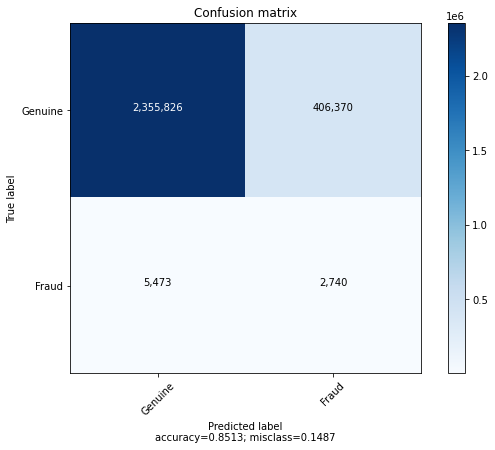

In [53]:
plot_confusion_matrix(cm,['Genuine','Fraud'], normalize=False)